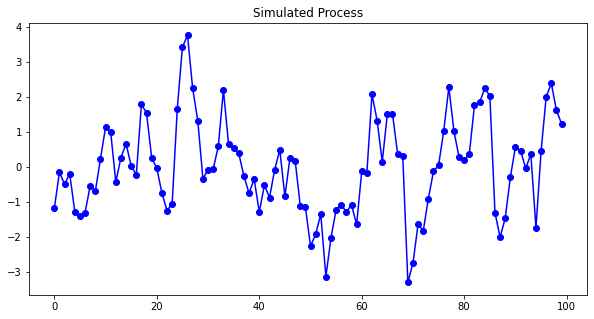

In [76]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline
#Affichage avec la bibliothèque graphique GTK
#%matplotlib gtk

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
#from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Generate the data
import numpy as np
ar = np.array([1, -0.8, 0.2])
ma = np.array([1])
my_simulation = ArmaProcess(ar, ma).generate_sample(nsample=100)

plt.figure(figsize=[10, 5]); # Set dimensions for figure
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.title("Simulated Process")
plt.show()

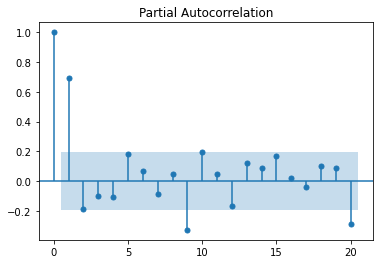

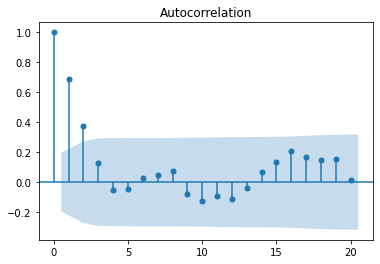

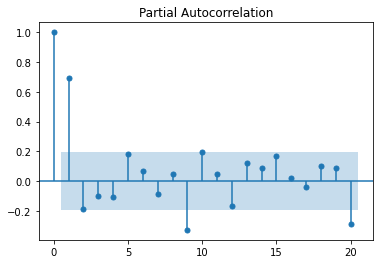

In [77]:
from pandas.plotting import autocorrelation_plot
plot_acf(my_simulation)  # ACF
plot_pacf(my_simulation) # PACF

In [78]:
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

mod = sm.tsa.arima.ARIMA(my_simulation, order=(2, 0, 0))
mod_fit = mod.fit()
print(mod_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -139.183
Date:                Wed, 29 Sep 2021   AIC                            286.366
Time:                        22:40:56   BIC                            296.787
Sample:                             0   HQIC                           290.583
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0074      0.269     -0.027      0.978      -0.535       0.521
ar.L1          0.8167      0.111      7.373      0.000       0.600       1.034
ar.L2         -0.1839      0.112     -1.640      0.1

Text(0.5, 1.0, 'Simulated Process')

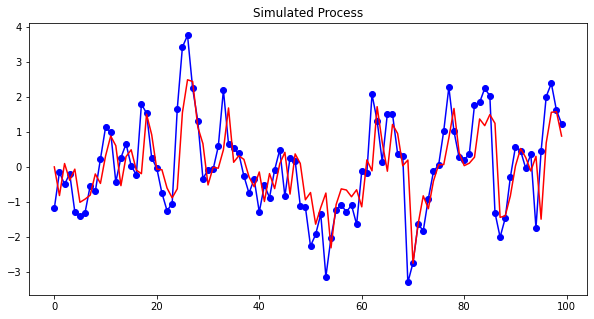

In [79]:
plt.figure(figsize=[10, 5]);
plt.plot(my_simulation, linestyle='-', marker='o', color='b')
plt.plot(mod_fit.fittedvalues, color='red')
plt.title("Simulated Process")


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import datetime
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


In [163]:
#Charger les données
data=pd.read_csv('AirPassengers.csv')
data.rename(columns={'Month': 'month',
             '#Passengers': 'passengers'}, inplace=True)


In [165]:
data['month'] = pd.to_datetime(data.month)

In [166]:
#del data['month']

In [167]:
data.head()

,month,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [168]:
len(data)

144

In [169]:
data.index=data.month
data
del data['month']

In [170]:
'''data['month']=pd.to_datetime(data['month'])
data.tail()'''


"data['month']=pd.to_datetime(data['month'])\ndata.tail()"

Text(0, 0.5, 'Passengers')

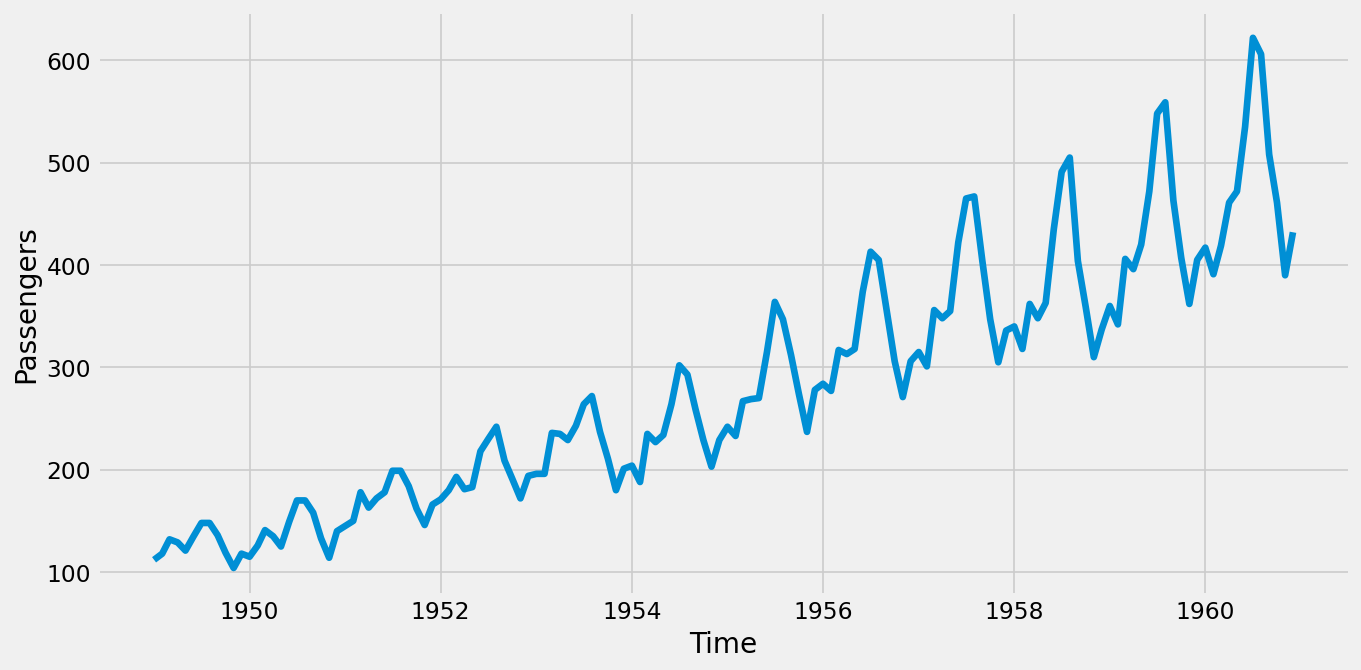

In [171]:
#Affichage des données
plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Passengers')

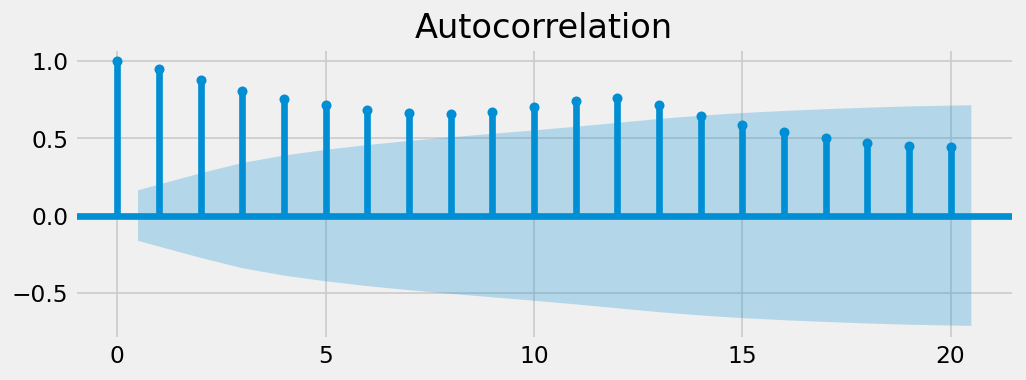

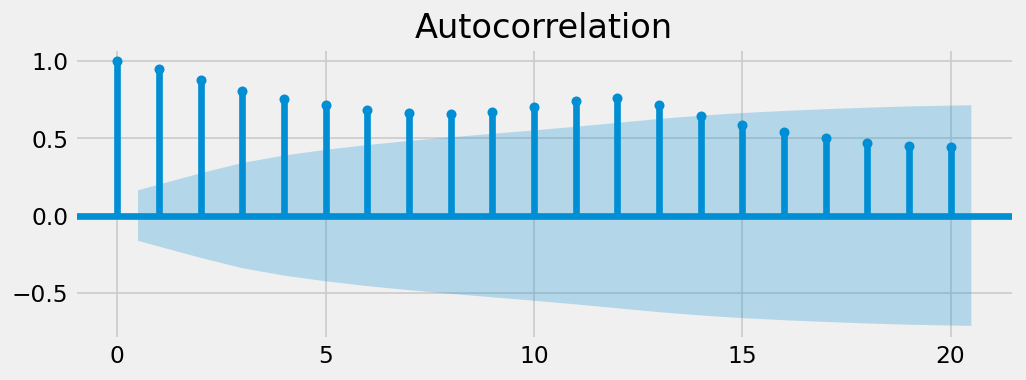

In [172]:
#ACF plot avec intervalle de confience de 95% ie alpha=0.05
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['passengers'], lags=20, alpha=0.05)

In [173]:
#valeur acf
# Code optionnel pour éliminer les warnings

from warnings import filterwarnings
filterwarnings('ignore')

from statsmodels.tsa.stattools import acf
print(acf(data['passengers']))

[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992 0.74324019
 0.76039504 0.71266087 0.64634228 0.58592342 0.53795519 0.49974753
 0.46873401 0.44987066 0.4416288  0.45722376 0.48248203 0.51712699
 0.53218983 0.49397569 0.43772134 0.3876029  0.34802503 0.31498388
 0.28849682 0.27080187 0.26429011 0.27679934 0.2985215  0.32558712
 0.3370236  0.30333486 0.25397708 0.21065534 0.17217092]


In [174]:
#Differencing
#data['month']=data['month'].dt.month
data_df = data.diff()
data_df = data_df.dropna()
data_df

,passengers
month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


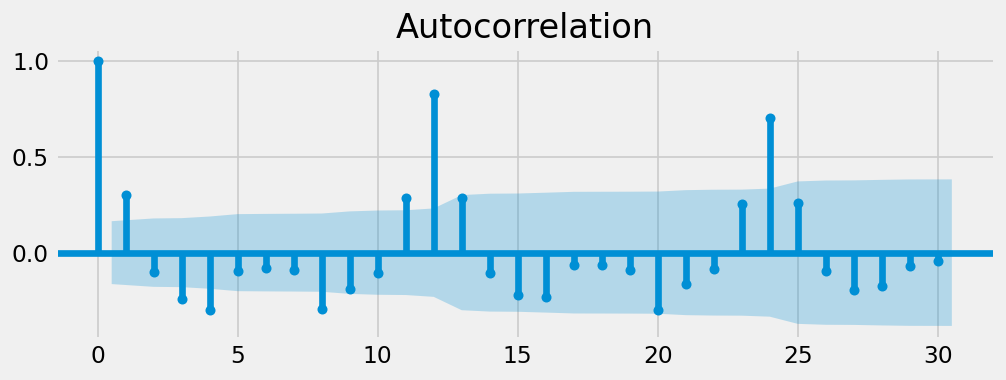

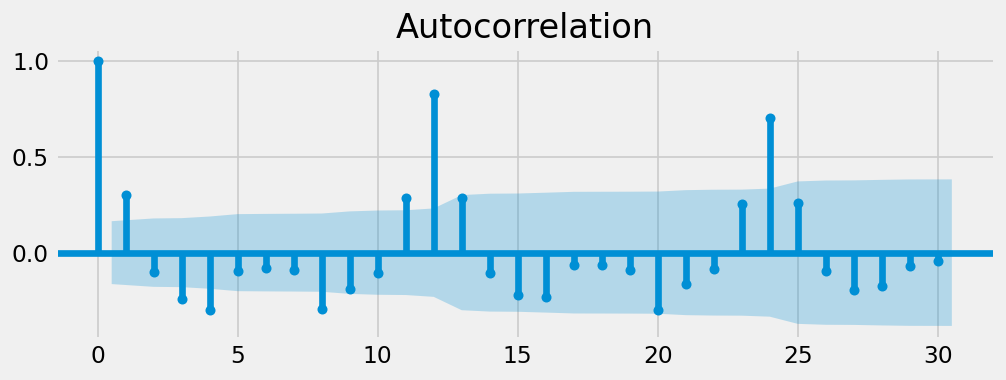

In [175]:
#plot ACF
plot_acf(data_df.passengers, lags=30)

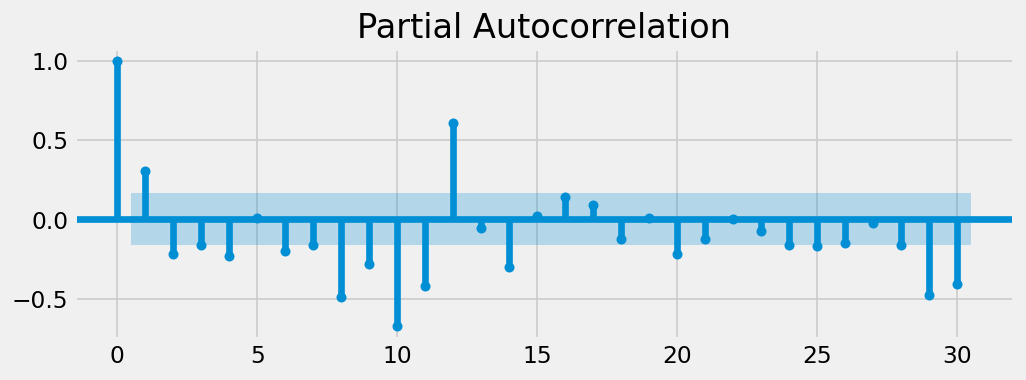

In [176]:
#plot PACF
plot_pacf(data_df.passengers, lags=30)
plt.show()

In [177]:
#seasonal differencing
data_df=data.diff(12)
data_df=data_df.dropna()

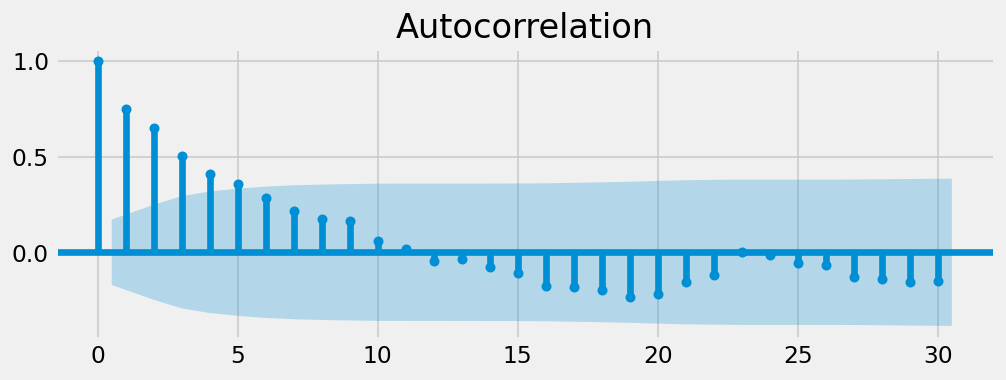

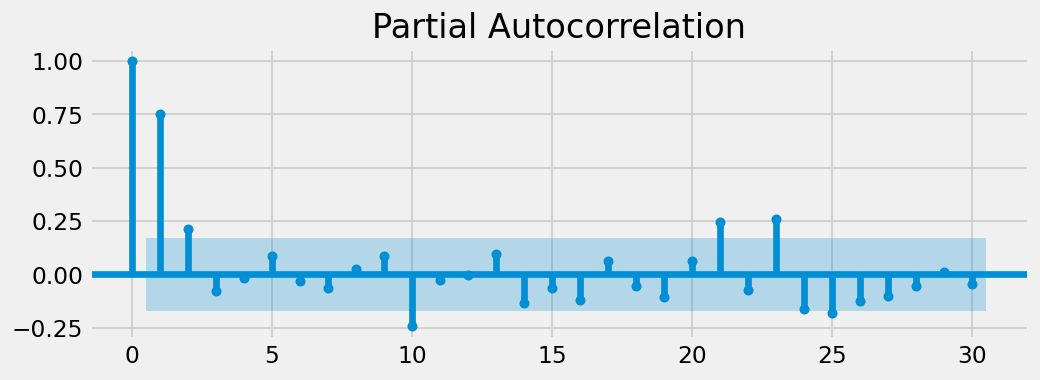

In [178]:
plot_acf(data_df.passengers, lags=30)
plot_pacf(data_df.passengers, lags=30)
plt.show()

In [179]:
#Entrainer le model
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model(1,1,1)
model=ARIMA(data.passengers, order=(1,1,1))
res=model.fit()
print(res.summary())

                             ARIMA Model Results                              
Dep. Variable:           D.passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Thu, 30 Sep 2021   AIC                           1402.145
Time:                        15:07:03   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.passengers  

In [180]:
import statsmodels.api as sm
mod=sm.tsa.statespace.SARIMAX(data.passengers,
                             order=(1,1,1),
                             seasonal_order=(1,1,1,12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)

result=mod.fit()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Thu, 30 Sep 2021   AIC                            922.205
Time:                                    15:07:04   BIC                            936.016
Sample:                                01-01-1949   HQIC                           927.812
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557
ma.L1         -0.0987      0.374   

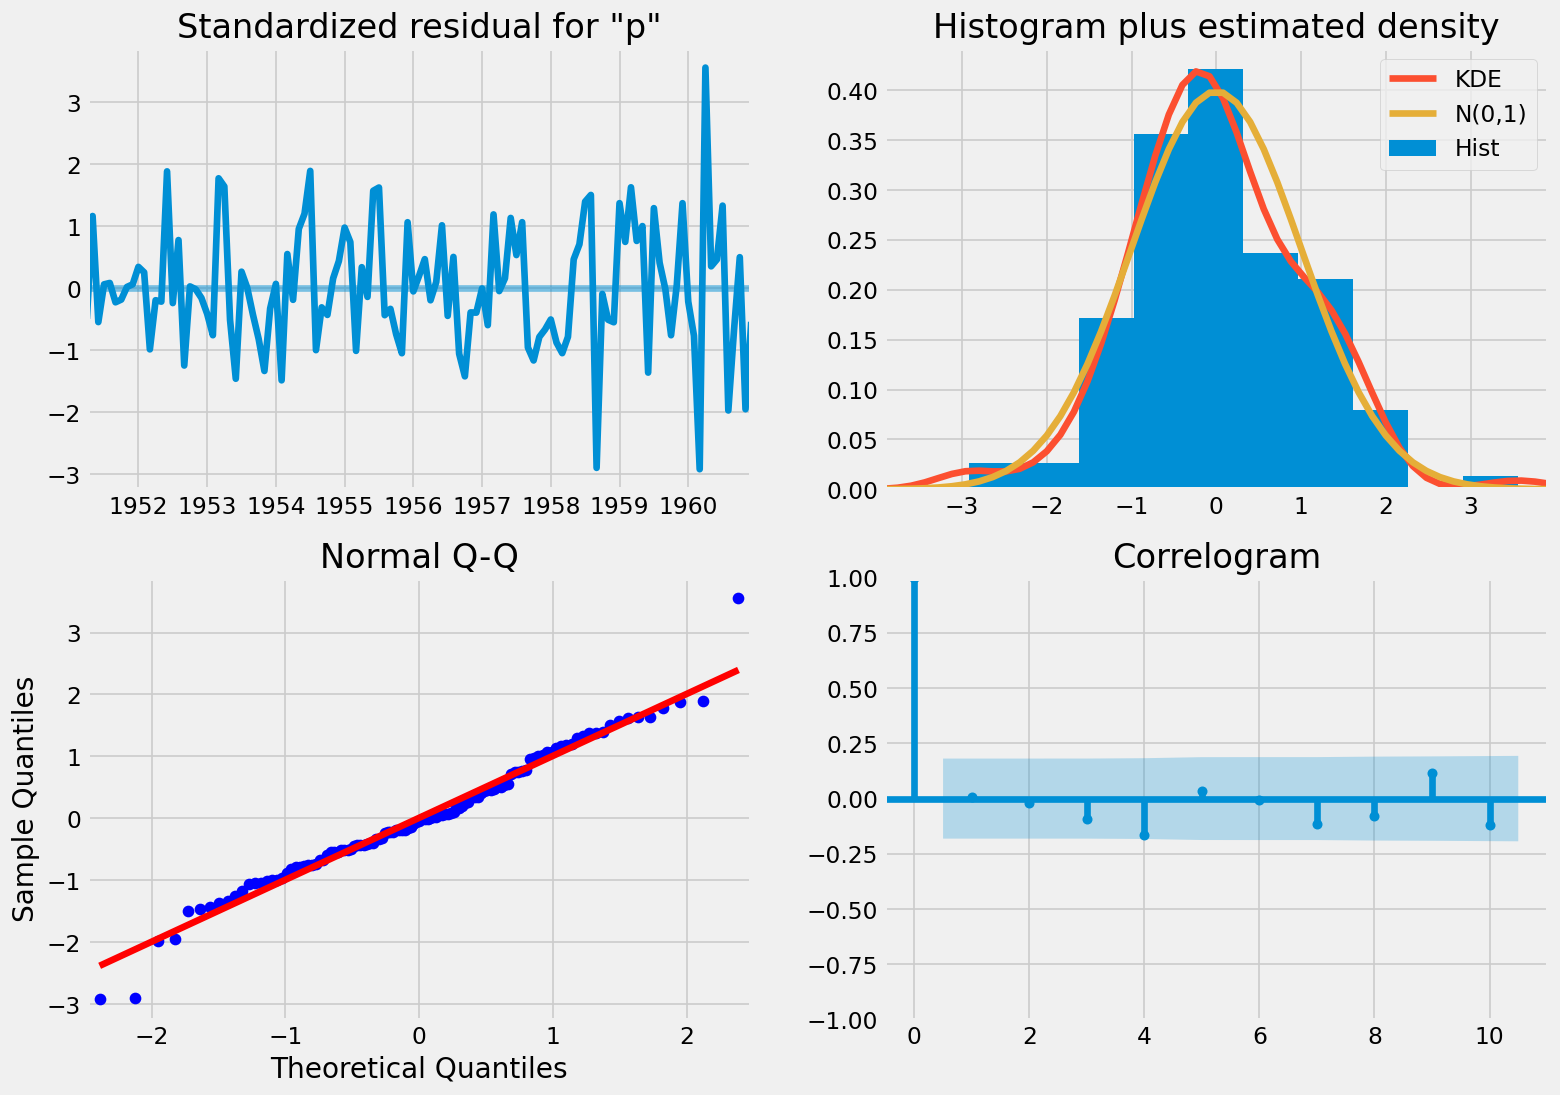

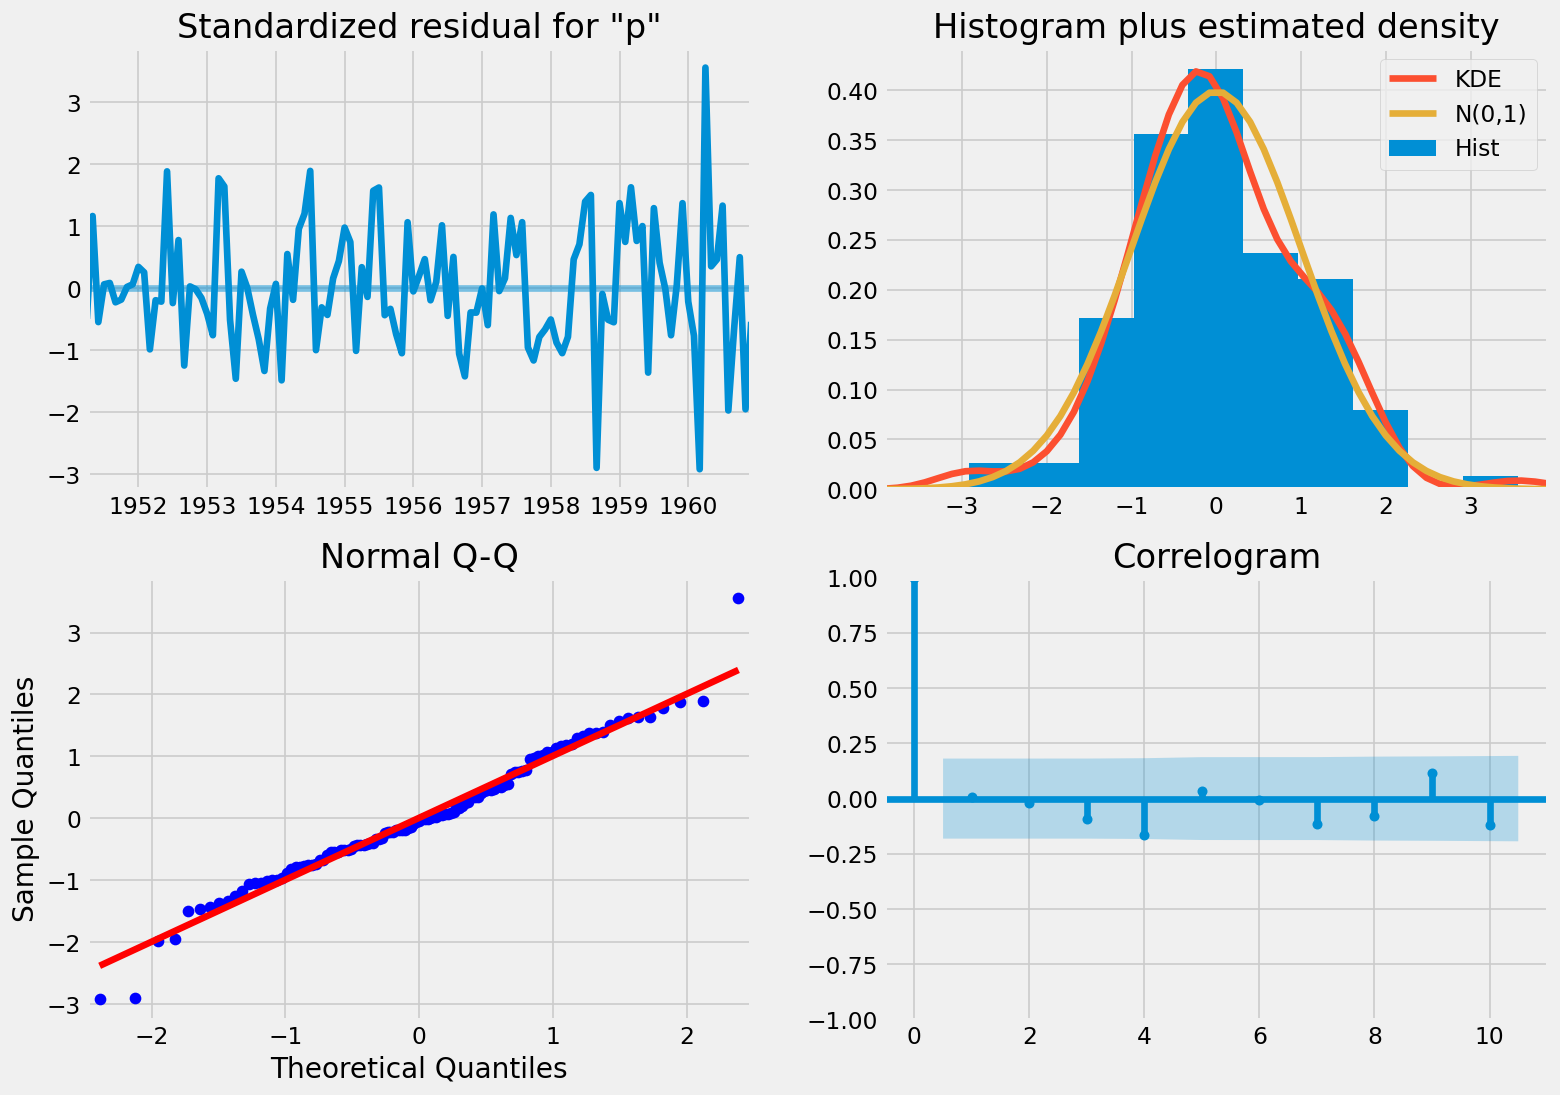

In [197]:
result.plot_diagnostics(figsize=(14,10))

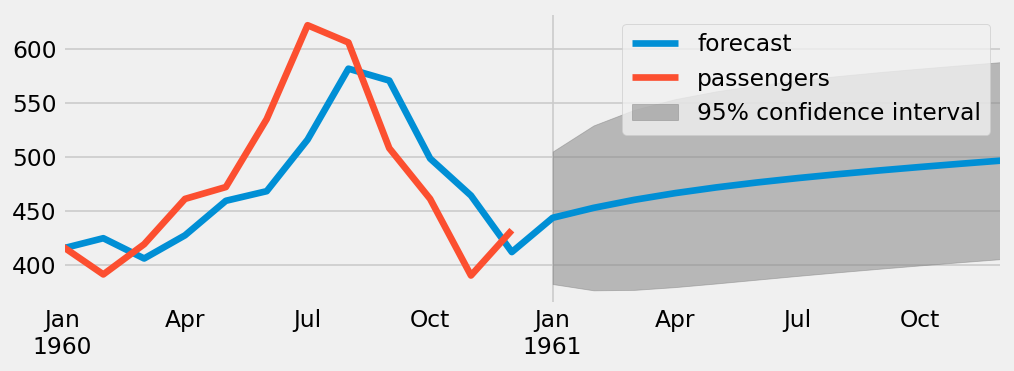

In [181]:
res.plot_predict(start='1960-01-01', end='1961-12-01')
plt.show()

In [182]:
#forecasting
forecast, SE, Interval = res.forecast(steps=12, alpha=0.05)
forecast

array([443.49288781, 452.67653437, 460.1513406 , 466.36160364,
       471.63610374, 476.21813852, 480.28774842, 483.97816352,
       487.38797416, 490.59013728, 493.63864108, 496.57343685])

In [183]:
SE

array([31.33795917, 38.98524892, 42.59507079, 44.44776317, 45.4302983 ,
       45.9594378 , 46.2466312 , 46.40314643, 46.48863178, 46.53537765,
       46.56095624, 46.57495744])

In [184]:
Interval

array([[382.07161649, 504.91415913],
       [376.26685056, 529.08621818],
       [376.66653593, 543.63614526],
       [379.24558864, 553.47761865],
       [382.59435527, 560.67785221],
       [386.13929567, 566.29698136],
       [389.64601687, 570.92947998],
       [393.02966774, 574.9266593 ],
       [396.27193017, 578.50401815],
       [399.38247309, 581.79780147],
       [402.38084377, 584.89643839],
       [405.28819769, 587.85867602]])

In [191]:
#forecast 36 steps ahead
forecast_values=result.get_forecast(steps=36)
#Confidence Intervals of the forecasted values
forecast_ci=forecast_values.conf_int()
#prediction summary
forecast_values.summary_frame()

passengers,mean,mean_se,mean_ci_lower,mean_ci_upper
1961-01-01,447.222620,11.844600,424.007631,470.437608
1961-02-01,422.734098,14.266935,394.771419,450.696778
1961-03-01,457.700895,16.787551,424.797899,490.603890
1961-04-01,492.277505,18.881302,455.270833,529.284177
1961-05-01,505.563366,20.784704,464.826094,546.300637
1961-06-01,565.671782,22.523671,521.526198,609.817365
1961-07-01,651.986404,24.138576,604.675664,699.297144
1961-08-01,639.634242,25.651823,589.357592,689.910892
1961-09-01,543.058845,27.080685,489.981678,596.136013
1961-10-01,493.727025,28.437835,437.989894,549.464157


In [192]:
forecast_ci

,lower passengers,upper passengers
1961-01-01,424.007631,470.437608
1961-02-01,394.771419,450.696778
1961-03-01,424.797899,490.603890
1961-04-01,455.270833,529.284177
1961-05-01,464.826094,546.300637
1961-06-01,521.526198,609.817365
1961-07-01,604.675664,699.297144
1961-08-01,589.357592,689.910892
1961-09-01,489.981678,596.136013
1961-10-01,437.989894,549.464157


In [193]:
#Prédiction
forecast_values.predicted_mean

1961-01-01    447.222620
1961-02-01    422.734098
1961-03-01    457.700895
1961-04-01    492.277505
1961-05-01    505.563366
1961-06-01    565.671782
1961-07-01    651.986404
1961-08-01    639.634242
1961-09-01    543.058845
1961-10-01    493.727025
1961-11-01    426.938001
1961-12-01    470.135609
1962-01-01    483.700432
1962-02-01    458.363243
1962-03-01    489.531496
1962-04-01    528.160092
1962-05-01    540.198141
1962-06-01    601.885317
1962-07-01    688.574175
1962-08-01    674.230265
1962-09-01    576.877026
1962-10-01    528.818396
1962-11-01    459.730150
1962-12-01    502.273855
1963-01-01    516.743847
1963-02-01    491.870036
1963-03-01    525.112320
1963-04-01    561.528504
1963-05-01    574.247867
1963-06-01    635.073029
1963-07-01    721.557552
1963-08-01    708.301150
1963-09-01    611.372618
1963-10-01    562.618817
1963-11-01    494.785962
1963-12-01    537.686703
Freq: MS, Name: predicted_mean, dtype: float64

In [194]:
forecast_values.conf_int()

,lower passengers,upper passengers
1961-01-01,424.007631,470.437608
1961-02-01,394.771419,450.696778
1961-03-01,424.797899,490.603890
1961-04-01,455.270833,529.284177
1961-05-01,464.826094,546.300637
1961-06-01,521.526198,609.817365
1961-07-01,604.675664,699.297144
1961-08-01,589.357592,689.910892
1961-09-01,489.981678,596.136013
1961-10-01,437.989894,549.464157


In [195]:
data

,passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


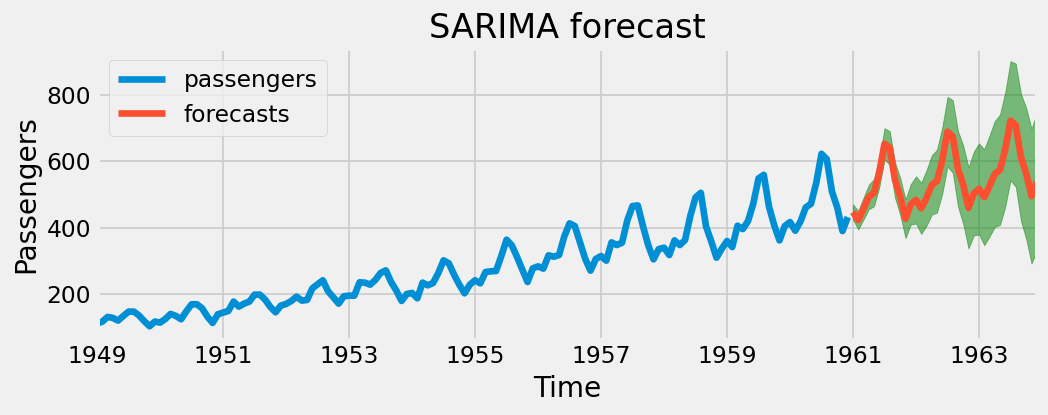

In [196]:
#plot forecasted series and original data
ax=data.plot()

#plot forecasted values
forecast_values.predicted_mean.plot(ax=ax, label='forecasts')

#plot theconfidence intervals
ax.fill_between(forecast_ci.index,
               forecast_ci.iloc[:,0],
               forecast_ci.iloc[:,1], color='g', alpha=.5)
#Axes labels and Title
ax.set_xlabel('Time')
ax.set_ylabel('Passengers')
ax.set_title('SARIMA forecast')

#legend
plt.legend()